In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
purchase_behavior = pd.read_csv("QVI_purchase_behaviour.csv")
print(purchase_behavior.head())

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [4]:
transactions_data = pd.read_excel("QVI_transaction_data.xlsx")
print(transactions_data.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [5]:
joined_sets = pd.merge(purchase_behavior, transactions_data, on="LYLTY_CARD_NBR", how="right")
print(joined_sets.head())

   LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER   DATE  STORE_NBR  \
0            1000  YOUNG SINGLES/COUPLES          Premium  43390          1   
1            1002  YOUNG SINGLES/COUPLES       Mainstream  43359          1   
2            1003         YOUNG FAMILIES           Budget  43531          1   
3            1003         YOUNG FAMILIES           Budget  43532          1   
4            1004  OLDER SINGLES/COUPLES       Mainstream  43406          1   

   TXN_ID  PROD_NBR                               PROD_NAME  PROD_QTY  \
0       1         5  Natural Chip        Compny SeaSalt175g         2   
1       2        58   Red Rock Deli Chikn&Garlic Aioli 150g         1   
2       3        52   Grain Waves Sour    Cream&Chives 210G         1   
3       4       106  Natural ChipCo      Hony Soy Chckn175g         1   
4       5        96          WW Original Stacked Chips 160g         1   

   TOT_SALES  
0        6.0  
1        2.7  
2        3.6  
3        3.0  
4        1.

In [6]:
from datetime import date, timedelta
##convert date to datetime format

## integer dates start at December 30, 1899
start = date(1899,12,30)

## list to store new dates
new_dates = []

for date in joined_sets['DATE']:
    num_days = timedelta(date)
    new_dates.append(start + num_days)

joined_sets['DATE'] = pd.to_datetime(pd.Series(new_dates)) 
print(joined_sets.head())

   LYLTY_CARD_NBR              LIFESTAGE PREMIUM_CUSTOMER       DATE  \
0            1000  YOUNG SINGLES/COUPLES          Premium 2018-10-17   
1            1002  YOUNG SINGLES/COUPLES       Mainstream 2018-09-16   
2            1003         YOUNG FAMILIES           Budget 2019-03-07   
3            1003         YOUNG FAMILIES           Budget 2019-03-08   
4            1004  OLDER SINGLES/COUPLES       Mainstream 2018-11-02   

   STORE_NBR  TXN_ID  PROD_NBR                               PROD_NAME  \
0          1       1         5  Natural Chip        Compny SeaSalt175g   
1          1       2        58   Red Rock Deli Chikn&Garlic Aioli 150g   
2          1       3        52   Grain Waves Sour    Cream&Chives 210G   
3          1       4       106  Natural ChipCo      Hony Soy Chckn175g   
4          1       5        96          WW Original Stacked Chips 160g   

   PROD_QTY  TOT_SALES  
0         2        6.0  
1         1        2.7  
2         1        3.6  
3         1        3.0

In [7]:
## check to see if all products are chips
joined_sets["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [8]:
import string
import re

#remove numberics plus gram unit at end and special charecters in one step
prod_name_split_words = joined_sets['PROD_NAME'].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()

print(prod_name_split_words.head(20))

0              [Natural, Chip, Compny, SeaSalt]
1       [Red, Rock, Deli, Chikn, Garlic, Aioli]
2           [Grain, Waves, Sour, Cream, Chives]
3           [Natural, ChipCo, Hony, Soy, Chckn]
4                [WW, Original, Stacked, Chips]
5                              [Cheetos, Puffs]
6     [Infuzions, SourCream, Herbs, Veg, Strws]
7             [RRD, SR, Slow, Rst, Pork, Belly]
8                    [Doritos, Cheese, Supreme]
9                           [Doritos, Mexicana]
10     [Old, El, Paso, Salsa, Dip, Tomato, Med]
11         [GrnWves, Plus, Btroot, Chilli, Jam]
12     [Old, El, Paso, Salsa, Dip, Tomato, Med]
13    [Infuzions, SourCream, Herbs, Veg, Strws]
14      [Smiths, Crinkle, Cut, Chips, Barbecue]
15                   [Doritos, Cheese, Supreme]
16         [Kettle, Sensations, Camembert, Fig]
17     [Doritos, Corn, Chip, Southern, Chicken]
18                         [CCs, Tasty, Cheese]
19                 [Tostitos, Splash, Of, Lime]
Name: PROD_NAME, dtype: object


In [9]:
word_counts = {}

#nested loop to go through arrays and count words
for line in prod_name_split_words:
    for word in line:
        if (word not in word_counts) and (word.isnumeric() == False):
            word_counts[word] = 1
        elif word in word_counts:
            word_counts[word] += 1         

print(pd.Series(word_counts).sort_values(ascending=False))  

Chips     49770
Kettle    41288
Smiths    28860
Salt      27976
Cheese    27890
          ...  
Onin       1432
Pc         1431
Garden     1419
NCC        1419
Fries      1418
Length: 198, dtype: int64


In [9]:
#removing values that contain salsa or Salsa
joined_sets = joined_sets[~joined_sets['PROD_NAME'].str.contains(r"[Ss]alsa")]

In [10]:
#pandas equivalent to r summary function
summary_statistics = joined_sets.describe()
print(summary_statistics)

       LYLTY_CARD_NBR     STORE_NBR        TXN_ID       PROD_NBR  \
count    2.648360e+05  264836.00000  2.648360e+05  264836.000000   
mean     1.355495e+05     135.08011  1.351583e+05      56.583157   
std      8.057998e+04      76.78418  7.813303e+04      32.826638   
min      1.000000e+03       1.00000  1.000000e+00       1.000000   
25%      7.002100e+04      70.00000  6.760150e+04      28.000000   
50%      1.303575e+05     130.00000  1.351375e+05      56.000000   
75%      2.030942e+05     203.00000  2.027012e+05      85.000000   
max      2.373711e+06     272.00000  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  
mean        1.907309       7.304200  
std         0.643654       3.083226  
min         1.000000       1.500000  
25%         2.000000       5.400000  
50%         2.000000       7.400000  
75%         2.000000       9.200000  
max       200.000000     650.000000  


In [11]:
outliers = joined_sets['PROD_QTY'].value_counts(bins = 4)
print(outliers)

(0.8, 50.75]       264834
(150.25, 200.0]         2
(100.5, 150.25]         0
(50.75, 100.5]          0
Name: PROD_QTY, dtype: int64


In [12]:
joined_sets.sort_values(by="PROD_QTY", ascending=False).head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221626,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
221625,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
145041,148238,OLDER SINGLES/COUPLES,Mainstream,2019-05-20,148,148046,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0
89729,93152,RETIREES,Premium,2018-08-16,93,91631,46,Kettle Original 175g,5,27.0
76734,80018,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-15,80,78356,26,Pringles Sweet&Spcy BBQ 134g,5,18.5


In [13]:
# looking at the head of the dataframe in descendng order tells us that 5 is the highest value for PROD_QTY after 200, we must 
#remove all rows with a PROD_QTY < 6
joined_sets = joined_sets[joined_sets['PROD_QTY'] < 6]

In [14]:
#check to see if that customer got removed (if length = 0, then removed)
len(joined_sets[joined_sets['LYLTY_CARD_NBR'] == 226000])

0

In [15]:
#check for date issues
joined_sets['DATE'].describe()

count                  264834
unique                    364
top       2018-12-24 00:00:00
freq                      939
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [16]:
#find missing date using differenc emethod
null_date = pd.date_range(start=joined_sets['DATE'].min(), end=joined_sets['DATE'].max()).difference(joined_sets['DATE'])

In [17]:
transaction_by_date = pd.merge(pd.Series(pd.date_range(start=joined_sets['DATE'].min(), end=joined_sets['DATE'].max()), name='DATE'), joined_sets, on='DATE', how='left')

<ipython-input-18-7cd527c1b9a3>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  month = transactions_by_date_list[(transactions_by_date_list.index >= pd.datetime(2018,12,1)) & (transactions_by_date_list.index < pd.datetime(2019,1,1))].sort_index()


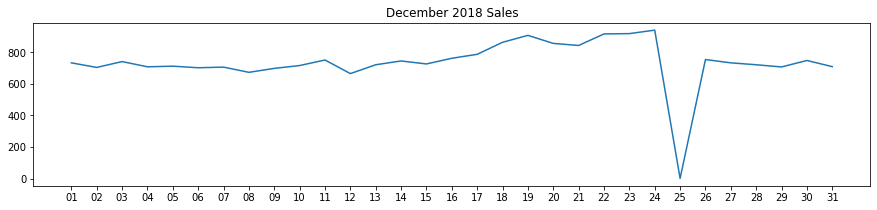

In [18]:
transactions_by_date_list = transaction_by_date['DATE'].value_counts()
month = transactions_by_date_list[(transactions_by_date_list.index >= pd.datetime(2018,12,1)) & (transactions_by_date_list.index < pd.datetime(2019,1,1))].sort_index()
month.index = month.index.strftime('%d')
ax = month.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(month)))
ax.set_xticklabels(month.index)
plt.title("December 2018 Sales")
plt.savefig("December_2018_Sales.png", bbox_inches="tight")
plt.show()

In [19]:
#check day where appears in list once (day that was added manually)
print(transaction_by_date['DATE'].value_counts().sort_values().head())

2018-12-25      1
2018-11-25    648
2018-10-18    658
2019-06-13    659
2019-06-24    662
Name: DATE, dtype: int64


count    258770.000000
mean        182.324276
std          64.955035
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64


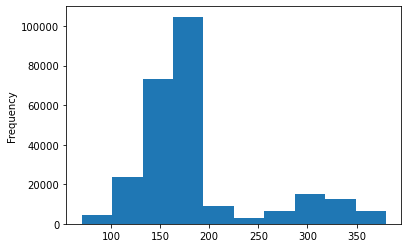

In [20]:
import collections

#PACK_SIZE = {}

joined_sets['PROD_NAME'] = joined_sets['PROD_NAME'].str.replace(r'[0-9]+(G)','g')
PACK_SIZE = joined_sets['PROD_NAME'].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
print(PACK_SIZE.describe())
PACK_SIZE.plot.hist()

#joined_sets['PROD_NAME'] = joined_sets['PROD_NAME'].str.replace(r'[0-9]+(G)','g')

#print(joined_sets['PROD_NAME'].head(20))

#for line in prod_name_split_words:
 #   size = re.sub('[^0-9]', "", line[-1])
  #  if size:
   #     if int(size) not in PACK_SIZE:
    #        PACK_SIZE[int(size)] = 1
     #   else:
      #      PACK_SIZE[int(size)] += 1

#PACK_SIZE = collections.OrderedDict(sorted(PACK_SIZE.items()))
#print(PACK_SIZE)
#plt.bar(list(PACK_SIZE.keys()),PACK_SIZE.values(), color='b')
#plt.xlabel('Pack Size')
#plt.ylabel('Frequency')
#plt.show()
#plt.plot(list(PACK_SIZE.keys()),list(PACK_SIZE.values()))

In [21]:
#list of product brand names
joined_sets['PROD_NAME'].str.split().str[0].value_counts().sort_index()

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       24962
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Old            9324
Pringles      25102
RRD           11894
Red            5885
Smith          2963
Smiths        28860
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     4437
Name: PROD_NAME, dtype: int64

In [22]:
joined_sets['Cleaned_Brand_Names'] = joined_sets['PROD_NAME'].str.split().str[0]

def clean_brand_names(line):
    brand = line['Cleaned_Brand_Names']
    if brand == 'Dorito':
        return  'Doritos'
    elif brand == 'GrnWves' or brand == 'Grain':
        return 'Grain Waves'
    elif brand == 'Infzns':
        return 'Infuzions'
    elif brand == 'Natural' or brand == 'NCC':
        return 'Natural Chip Co'
    elif brand == 'Red':
        return 'RRD'
    elif brand == 'Smith':
        return 'Smiths'
    elif brand == 'Snbts':
        return 'Sunbites'
    elif brand == 'WW':
        return'Woolworths'
    else:
        return brand


joined_sets['Cleaned_Brand_Names'] = joined_sets.apply(lambda line: clean_brand_names(line), axis=1)

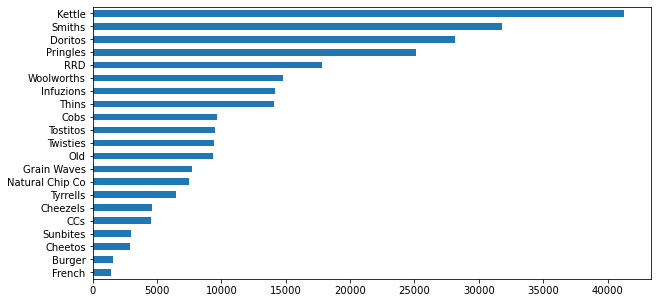

In [23]:
joined_sets['Cleaned_Brand_Names'].value_counts(ascending=True).plot.barh(figsize=(10,5))

In [24]:
#check for nulls
joined_sets.isnull().sum()

LYLTY_CARD_NBR         0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
DATE                   0
STORE_NBR              0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
Cleaned_Brand_Names    0
dtype: int64

In [25]:
grouped_sales = pd.DataFrame(joined_sets.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].agg(['sum', 'mean']))
grouped_sales.sort_values(ascending=False, by='sum')

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            168363.25  7.269570
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
RETIREES               Mainstream        155677.05  7.252262
YOUNG FAMILIES         Budget            139345.85  7.287201
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
                       Mainstream        133393.80  7.282116
                       Premium           132263.15  7.449766
RETIREES               Budget            113147.80  7.443445
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Premium            97646.05  7.456174
YOUNG FAMILIES         Mainstream         92788.75  7.189025
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG FAMILIES         Premium            84025.50  7.266756
OLDER FAMILIES         Premium            80658.40  7.208079
YOUNG SINGLES/COUPLES  Budget             61141.60  6.615624
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
MIDAGE SINGLES/COUPLES Budget             35514.80  7.074661
NEW FAMILIES           Budget             21928.45  7.297321
                       Mainstream         17013.90  7.317806
                       Premium            11491.10  7.231655

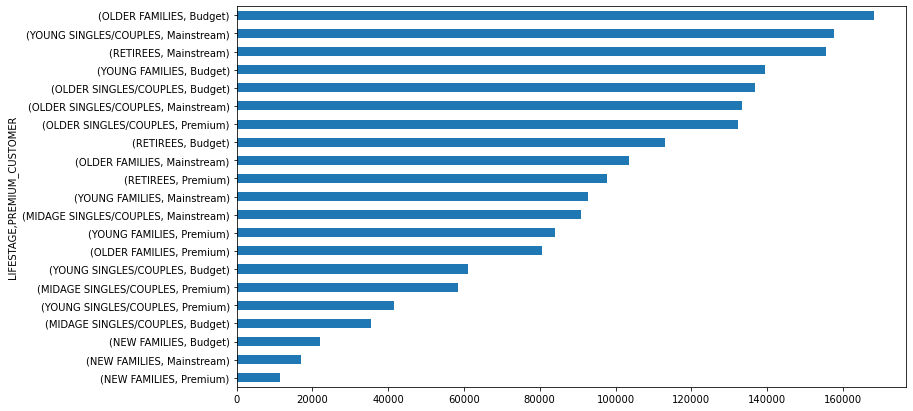

In [26]:
#bar graph plotting different groups and their total money spent on chips
grouped_sales['sum'].sort_values().plot.barh(figsize=(12,7))

In [28]:
#creates table showing average purchases per segment and unique customers per segment
freq_per_cust = joined_sets.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']).count()['DATE']
freq_per_cust.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(['mean', 'count']).sort_values(ascending=False, by='mean')

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        5.031438   2831
                       Budget            4.954011   4675
                       Premium           4.923009   2273
YOUNG FAMILIES         Budget            4.760269   4017
                       Premium           4.752569   2433
                       Mainstream        4.731305   2728
OLDER SINGLES/COUPLES  Premium           3.737684   4750
                       Budget            3.734429   4929
                       Mainstream        3.715619   4930
MIDAGE SINGLES/COUPLES Mainstream        3.555090   3340
RETIREES               Budget            3.412887   4454
                       Premium           3.382231   3872
MIDAGE SINGLES/COUPLES Premium           3.379679   2431
                       Budget            3.337766   1504
RETIREES               Mainstream        3.313166   6479
NEW FAMILIES           Mainstream        2.738516    849
                       Premium           2.702381    588
                       Budget            2.702338   1112
YOUNG SINGLES/COUPLES  Mainstream        2.578388   8088
                       Budget            2.445621   3779
                       Premium           2.440171   2574

In [29]:
grouped_sales.sort_values(ascending=False, by='mean')

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
MIDAGE SINGLES/COUPLES Mainstream         90803.85  7.647284
YOUNG SINGLES/COUPLES  Mainstream        157621.60  7.558339
RETIREES               Premium            97646.05  7.456174
OLDER SINGLES/COUPLES  Premium           132263.15  7.449766
RETIREES               Budget            113147.80  7.443445
OLDER SINGLES/COUPLES  Budget            136769.80  7.430315
NEW FAMILIES           Mainstream         17013.90  7.317806
                       Budget             21928.45  7.297321
YOUNG FAMILIES         Budget            139345.85  7.287201
OLDER SINGLES/COUPLES  Mainstream        133393.80  7.282116
OLDER FAMILIES         Budget            168363.25  7.269570
YOUNG FAMILIES         Premium            84025.50  7.266756
OLDER FAMILIES         Mainstream        103445.55  7.262395
RETIREES               Mainstream        155677.05  7.252262
NEW FAMILIES           Premium            11491.10  7.231655
OLDER FAMILIES         Premium            80658.40  7.208079
YOUNG FAMILIES         Mainstream         92788.75  7.189025
MIDAGE SINGLES/COUPLES Premium            58432.65  7.112056
                       Budget             35514.80  7.074661
YOUNG SINGLES/COUPLES  Premium            41642.10  6.629852
                       Budget             61141.60  6.615624

Index(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES',
       'YOUNG SINGLES/COUPLES'],
      dtype='object', name='LIFESTAGE')


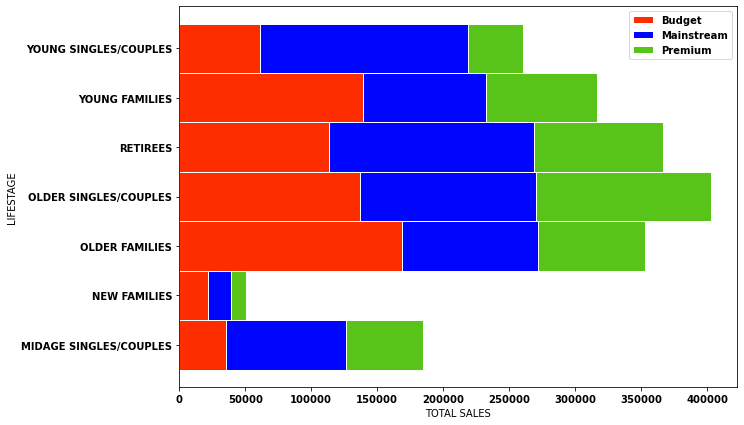

In [59]:
from matplotlib import rc

rc('font', weight='bold')

bars1 = grouped_sales[grouped_sales.index.get_level_values('PREMIUM_CUSTOMER') == 'Budget']['sum']
bars2 = grouped_sales[grouped_sales.index.get_level_values('PREMIUM_CUSTOMER') == 'Mainstream']['sum']
bars3 = grouped_sales[grouped_sales.index.get_level_values('PREMIUM_CUSTOMER') == 'Premium']['sum']

bar1_array = np.array(bars1)
bar2_array = np.array(bars2)
bar3_array = np.array(bars3)

all_bars = []

# Names of group and bar width
names = grouped_sales.index.get_level_values("LIFESTAGE").unique()
print(names)

colors = ['#FE2D00', '#0006FE','#58C419']

# The position of the bars on the x-axis
r = np.arange(len(names))

bar_height = 1
#plot bars
plt.figure(figsize=(10,7))
plt.barh(r, bar1_array, color=colors[0], edgecolor='white', height=bar_height, label = 'Budget')
plt.barh(r, bar2_array, left=bar1_array, color=colors[1], edgecolor='white', height=bar_height, label = 'Mainstream')
plt.barh(r, bar3_array, left=bar1_array + bar2_array, color=colors[2], edgecolor='white', height=bar_height, label = 'Premium')

plt.yticks(r, names)
plt.ylabel('LIFESTAGE')
plt.xlabel('TOTAL SALES')
plt.legend()
plt.savefig('lifestage_sales.png', bbox_inches="tight")


    

In [29]:
#running t test to find if There is a statistically significant difference to the Total Sales between the "Mainstream Young Midage" segment to the "Budget and Premium Young Midage

from scipy.stats import ttest_ind

mainstream = joined_sets['PREMIUM_CUSTOMER'] == 'Mainstream'
young_midage = (joined_sets['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') | (joined_sets['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')

budget_premium = (joined_sets['PREMIUM_CUSTOMER'] == 'Budget') | (joined_sets['PREMIUM_CUSTOMER'] == 'Premium')

a = joined_sets[young_midage & mainstream]['TOT_SALES']
b = joined_sets[young_midage & budget_premium]['TOT_SALES']
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

1.8346459081778177e-237


True

___________ YOUNG SINGLES/COUPLES - Premium ___________
Kettle      838
Smiths      787
Pringles    537
Name: Cleaned_Brand_Names, dtype: int64


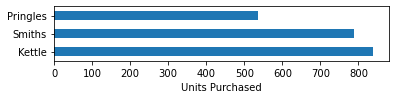

___________ YOUNG SINGLES/COUPLES - Mainstream ___________
Kettle      3844
Doritos     2379
Pringles    2315
Name: Cleaned_Brand_Names, dtype: int64


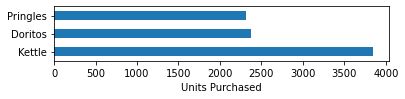

___________ YOUNG SINGLES/COUPLES - Budget ___________
Kettle      1211
Smiths      1185
Pringles     832
Name: Cleaned_Brand_Names, dtype: int64


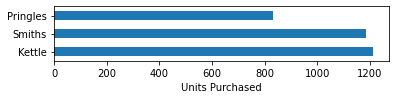

___________ YOUNG FAMILIES - Premium ___________
Kettle      1745
Smiths      1384
Pringles    1007
Name: Cleaned_Brand_Names, dtype: int64


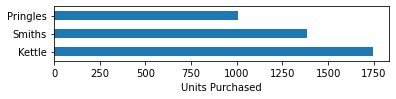

___________ YOUNG FAMILIES - Mainstream ___________
Kettle      1789
Smiths      1681
Pringles    1148
Name: Cleaned_Brand_Names, dtype: int64


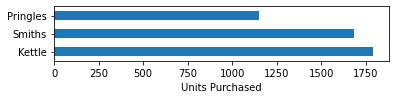

___________ YOUNG FAMILIES - Budget ___________
Kettle     2743
Smiths     2334
Doritos    1767
Name: Cleaned_Brand_Names, dtype: int64


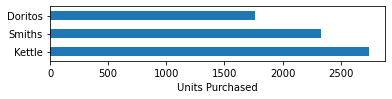

___________ OLDER SINGLES/COUPLES - Premium ___________
Kettle     2947
Smiths     1952
Doritos    1784
Name: Cleaned_Brand_Names, dtype: int64


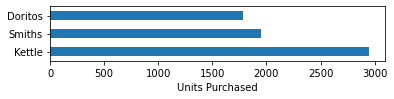

___________ OLDER SINGLES/COUPLES - Mainstream ___________
Kettle     2835
Smiths     2070
Doritos    1791
Name: Cleaned_Brand_Names, dtype: int64


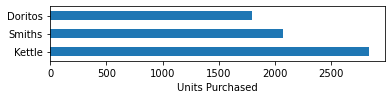

___________ OLDER SINGLES/COUPLES - Budget ___________
Kettle      3065
Smiths      2010
Pringles    1843
Name: Cleaned_Brand_Names, dtype: int64


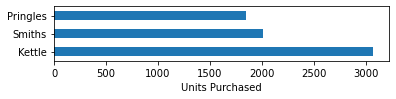

___________ MIDAGE SINGLES/COUPLES - Premium ___________
Kettle      1206
Smiths       923
Pringles     781
Name: Cleaned_Brand_Names, dtype: int64


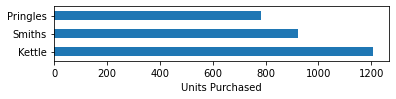

___________ MIDAGE SINGLES/COUPLES - Mainstream ___________
Kettle     2136
Smiths     1276
Doritos    1210
Name: Cleaned_Brand_Names, dtype: int64


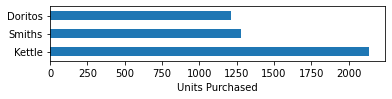

___________ MIDAGE SINGLES/COUPLES - Budget ___________
Kettle     713
Smiths     591
Doritos    479
Name: Cleaned_Brand_Names, dtype: int64


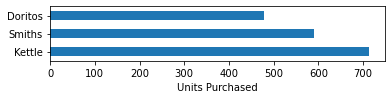

___________ NEW FAMILIES - Premium ___________
Kettle      247
Pringles    165
Smiths      155
Name: Cleaned_Brand_Names, dtype: int64


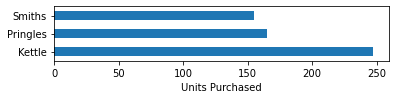

___________ NEW FAMILIES - Mainstream ___________
Kettle     414
Doritos    257
Smiths     244
Name: Cleaned_Brand_Names, dtype: int64


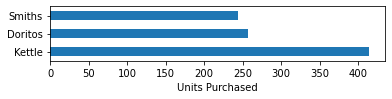

___________ NEW FAMILIES - Budget ___________
Kettle     510
Smiths     328
Doritos    315
Name: Cleaned_Brand_Names, dtype: int64


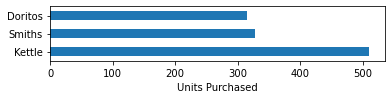

___________ OLDER FAMILIES - Premium ___________
Kettle      1512
Smiths      1448
Pringles    1014
Name: Cleaned_Brand_Names, dtype: int64


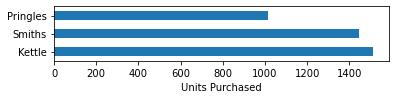

___________ OLDER FAMILIES - Mainstream ___________
Kettle     2019
Smiths     1742
Doritos    1263
Name: Cleaned_Brand_Names, dtype: int64


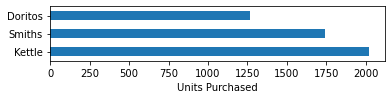

___________ OLDER FAMILIES - Budget ___________
Kettle     3320
Smiths     2948
Doritos    2032
Name: Cleaned_Brand_Names, dtype: int64


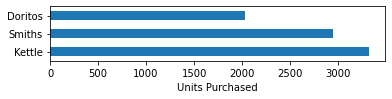

___________ RETIREES - Premium ___________
Kettle      2216
Smiths      1395
Pringles    1331
Name: Cleaned_Brand_Names, dtype: int64


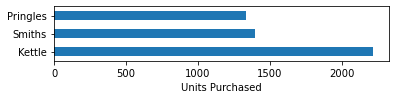

___________ RETIREES - Mainstream ___________
Kettle      3386
Smiths      2367
Pringles    2103
Name: Cleaned_Brand_Names, dtype: int64


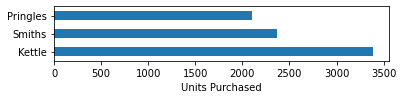

___________ RETIREES - Budget ___________
Kettle     2592
Smiths     1612
Doritos    1592
Name: Cleaned_Brand_Names, dtype: int64


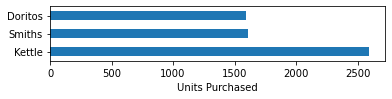

In [30]:
## plots showing what brands are the favorites amongst the top three segments that spend the most 

for stage in joined_sets['LIFESTAGE'].unique(): #going through the various life stages
    for prem in joined_sets['PREMIUM_CUSTOMER'].unique(): #budget, premium, and mainstream
        print('___________',stage, '-', prem,'___________') #artistic border to seperate graphs
        summary = joined_sets[(joined_sets["LIFESTAGE"] == stage) & (joined_sets["PREMIUM_CUSTOMER"] == prem)]["Cleaned_Brand_Names"].value_counts().head(3) #list containing purchase counts for the top three brands
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(6,1))
        plt.xlabel('Units Purchased')
        plt.show()

In [35]:
#using apriori algorithm to test for spending patterns amongst different demographics

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

temp = joined_sets.reset_index().rename(columns = {'index': 'transaction'})
temp['Segment'] = temp['LIFESTAGE'] + ' - ' + temp['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(temp['Segment']), pd.get_dummies(temp['Cleaned_Brand_Names'])], axis=1)


apriori_analysis = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)
buisness_rules = association_rules(apriori_analysis, metric='lift', min_threshold=1)

set_temp = temp['Segment'].unique()
buisness_rules[buisness_rules['antecedents'].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(OLDER FAMILIES - Budget),(Smiths),0.087193,0.123016,0.011948,0.137027,1.113895,0.001222,1.016236
3,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069596,0.167334,0.012422,0.178488,1.066658,0.000776,1.013578
4,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067115,0.167334,0.011944,0.177959,1.063495,0.000713,1.012925
6,(RETIREES - Budget),(Kettle),0.057652,0.167334,0.010505,0.182214,1.088926,0.000858,1.018196
9,(RETIREES - Mainstream),(Kettle),0.080935,0.167334,0.013723,0.169554,1.013269,0.000180,1.002674
10,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,0.002325,1.036537


========== YOUNG SINGLES/COUPLES - Premium ==========
134.0     537
150.0     896
175.0    1587
Name: Pack_Size, dtype: int64


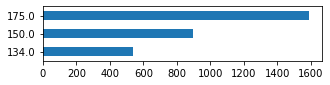

========== YOUNG SINGLES/COUPLES - Mainstream ==========
134.0    2315
150.0    2998
175.0    4928
Name: Pack_Size, dtype: int64


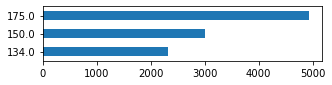

========== YOUNG SINGLES/COUPLES - Budget ==========
134.0     832
150.0    1325
175.0    2262
Name: Pack_Size, dtype: int64


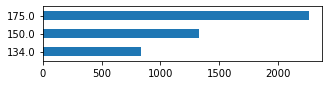

========== YOUNG FAMILIES - Premium ==========
134.0    1007
150.0    1697
175.0    2926
Name: Pack_Size, dtype: int64


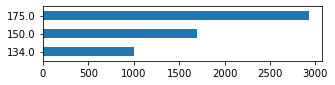

========== YOUNG FAMILIES - Mainstream ==========
134.0    1148
150.0    1927
175.0    3087
Name: Pack_Size, dtype: int64


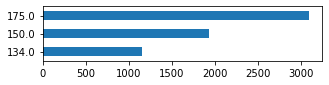

========== YOUNG FAMILIES - Budget ==========
134.0    1674
150.0    2749
175.0    4800
Name: Pack_Size, dtype: int64


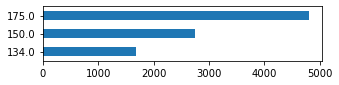

========== OLDER SINGLES/COUPLES - Premium ==========
134.0    1744
150.0    2672
175.0    4382
Name: Pack_Size, dtype: int64


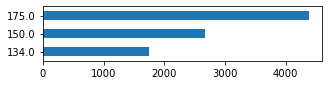

========== OLDER SINGLES/COUPLES - Mainstream ==========
134.0    1720
150.0    2660
175.0    4422
Name: Pack_Size, dtype: int64


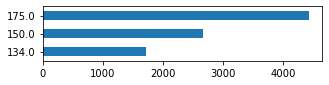

========== OLDER SINGLES/COUPLES - Budget ==========
134.0    1843
150.0    2726
175.0    4535
Name: Pack_Size, dtype: int64


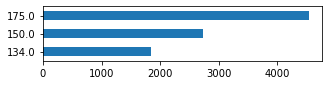

========== MIDAGE SINGLES/COUPLES - Premium ==========
134.0     781
150.0    1163
175.0    2034
Name: Pack_Size, dtype: int64


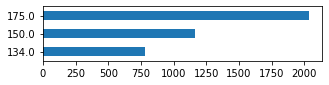

========== MIDAGE SINGLES/COUPLES - Mainstream ==========
134.0    1159
150.0    1714
175.0    2912
Name: Pack_Size, dtype: int64


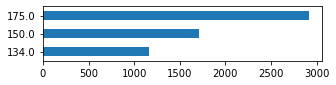

========== MIDAGE SINGLES/COUPLES - Budget ==========
134.0     449
150.0     746
175.0    1256
Name: Pack_Size, dtype: int64


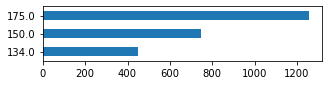

========== NEW FAMILIES - Premium ==========
134.0    165
150.0    225
175.0    371
Name: Pack_Size, dtype: int64


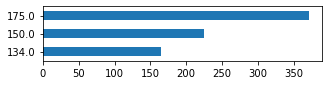

========== NEW FAMILIES - Mainstream ==========
134.0    224
150.0    362
175.0    579
Name: Pack_Size, dtype: int64


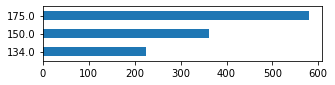

========== NEW FAMILIES - Budget ==========
134.0    309
150.0    425
175.0    763
Name: Pack_Size, dtype: int64


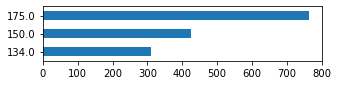

========== OLDER FAMILIES - Premium ==========
134.0    1014
150.0    1607
175.0    2747
Name: Pack_Size, dtype: int64


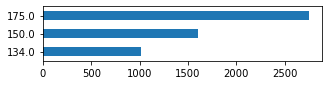

========== OLDER FAMILIES - Mainstream ==========
134.0    1234
150.0    2091
175.0    3489
Name: Pack_Size, dtype: int64


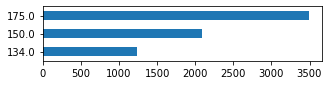

========== OLDER FAMILIES - Budget ==========
134.0    1996
150.0    3414
175.0    5662
Name: Pack_Size, dtype: int64


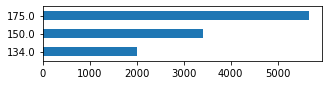

========== RETIREES - Premium ==========
134.0    1331
150.0    1883
175.0    3232
Name: Pack_Size, dtype: int64


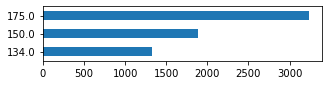

========== RETIREES - Mainstream ==========
134.0    2103
150.0    3183
175.0    5187
Name: Pack_Size, dtype: int64


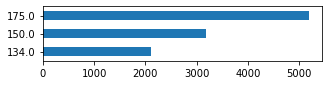

========== RETIREES - Budget ==========
134.0    1517
150.0    2242
175.0    3768
Name: Pack_Size, dtype: int64


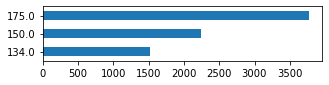

In [40]:
merged_pack = pd.concat([joined_sets, PACK_SIZE.rename('Pack_Size')], axis=1)

for stage in joined_sets['LIFESTAGE'].unique():
    for prem in joined_sets['PREMIUM_CUSTOMER'].unique():
        print('==========',stage, '-', prem,'==========')
        summary = merged_pack[(merged_pack['LIFESTAGE'] == stage) & (merged_pack['PREMIUM_CUSTOMER'] == prem)]['Pack_Size'].value_counts().head(3).sort_index()
        print(summary)
        plt.figure()
        summary.plot.barh(figsize=(5,1))
        plt.show()

In [41]:
(temp.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() / temp.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()).sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
OLDER FAMILIES          Mainstream          9.255380
                        Budget              9.076773
                        Premium             9.071717
YOUNG FAMILIES          Budget              8.722995
                        Premium             8.716013
                        Mainstream          8.638361
OLDER SINGLES/COUPLES   Budget              6.781398
                        Premium             6.769543
                        Mainstream          6.712021
MIDAGE SINGLES/COUPLES  Mainstream          6.432080
RETIREES                Budget              6.141847
                        Premium             6.103358
MIDAGE SINGLES/COUPLES  Premium             6.078514
                        Budget              6.026459
RETIREES                Mainstream          5.925920
NEW FAMILIES            Mainstream          4.891566
                        Budget              4.821527
                        Premium             4.815652
YOUNG

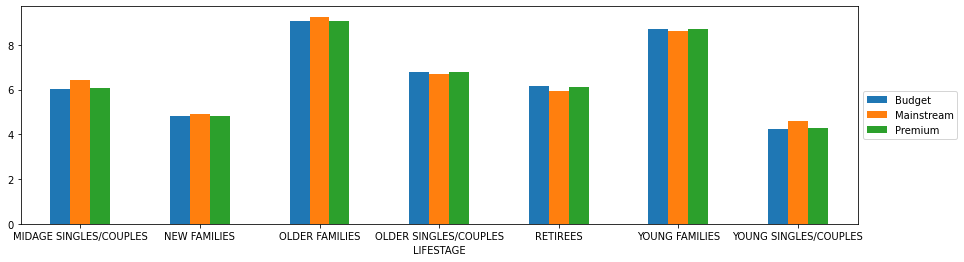

In [42]:
(temp.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum() / temp.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()).unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('Average purchase quantity per segment.png', bbox_inches='tight')

In [43]:
#Average chips price per transaction by segments
temp['Unit_Price'] = temp['TOT_SALES'] / temp['PROD_QTY']
temp.groupby(['Segment']).mean()['Unit_Price'].sort_values(ascending=False)

Segment
YOUNG SINGLES/COUPLES - Mainstream     4.065642
MIDAGE SINGLES/COUPLES - Mainstream    3.994241
RETIREES - Budget                      3.924404
RETIREES - Premium                     3.920942
NEW FAMILIES - Budget                  3.917688
NEW FAMILIES - Mainstream              3.916133
OLDER SINGLES/COUPLES - Premium        3.893182
OLDER SINGLES/COUPLES - Budget         3.882096
NEW FAMILIES - Premium                 3.872110
RETIREES - Mainstream                  3.844294
OLDER SINGLES/COUPLES - Mainstream     3.814665
MIDAGE SINGLES/COUPLES - Premium       3.770698
YOUNG FAMILIES - Premium               3.762150
YOUNG FAMILIES - Budget                3.760737
OLDER FAMILIES - Budget                3.745340
MIDAGE SINGLES/COUPLES - Budget        3.743328
OLDER FAMILIES - Mainstream            3.737077
YOUNG FAMILIES - Mainstream            3.724533
OLDER FAMILIES - Premium               3.717000
YOUNG SINGLES/COUPLES - Premium        3.665414
YOUNG SINGLES/COUPLES - Budget  

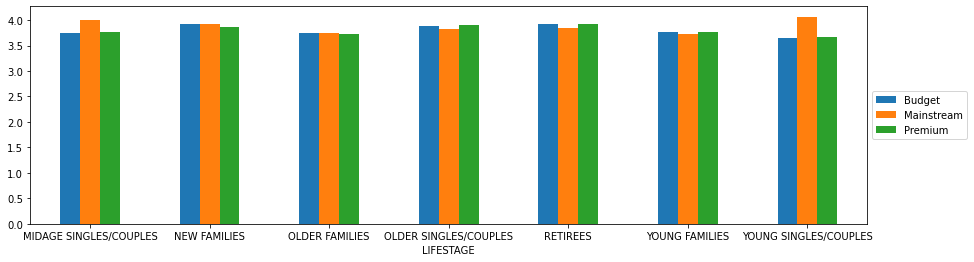

In [44]:
temp.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).mean()['Unit_Price'].unstack().plot.bar(figsize=(15,4), rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

#Insights 

Top 3 total sales contributor segment are

- Older families (Budget)
- Young Singles/Couples (Mainstream)
- Retirees (Mainstream)

- Young Sinlges/Couples have high total sales because they are the most populous demographic
- Older families have the highest purchase frequency
- Kettle brand chips were the most frequnently purchased by every segment
- Young and Midage Singles/Couples is the only segment that had a different preference (Doritos) as opposed to Smiths
- Most frequent chip size purchased is 175gr followed by the 150gr chip size for all segments.



#Reccomendations

Older Families:
- Focus on the Budget segment.
- Tend to make bigger purchaes, create coupons or specials to encourage bulk buying

Young Singles/Couples:
- Focus on the Mainstream segment.
- Most populous segment, make sure deals and specials reach them and reach them frequently (encourage refferals?)

Retirees:
- Focus on the Mainstream segment.
- Same scenario as Young Singles/Couples, their strenght is in their population size

General:
- All segments has Kettle as the most frequently purchased brand, and 175gr (regardless of brand) followed by 150gr as the preferred chip size.



In [45]:
z = temp.groupby(['Segment', 'Cleaned_Brand_Names']).sum()['TOT_SALES'].sort_values(ascending=False).reset_index()
z[z['Segment'] == 'YOUNG SINGLES/COUPLES - Mainstream']

,Segment,Cleaned_Brand_Names,TOT_SALES
0,YOUNG SINGLES/COUPLES - Mainstream,Kettle,35423.6
8,YOUNG SINGLES/COUPLES - Mainstream,Doritos,20925.9
22,YOUNG SINGLES/COUPLES - Mainstream,Pringles,16006.2
24,YOUNG SINGLES/COUPLES - Mainstream,Smiths,14958.9
54,YOUNG SINGLES/COUPLES - Mainstream,Infuzions,8749.4
61,YOUNG SINGLES/COUPLES - Mainstream,Twisties,7539.8
69,YOUNG SINGLES/COUPLES - Mainstream,Tostitos,7238.0
70,YOUNG SINGLES/COUPLES - Mainstream,Thins,7217.1
84,YOUNG SINGLES/COUPLES - Mainstream,Cobs,6144.6
115,YOUNG SINGLES/COUPLES - Mainstream,Tyrrells,4800.6
